### Author: Youchen (Victor) Zhang

In [16]:
reset -fs

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors 
import matplotlib.patches as patches # for drawing shapes


%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "Times New Roman"

# 1 Redesign a bubble chart

In [18]:
def label_order (target_list: list) -> list:
    """
    return a list of index associated with numerical order from the target list
    """
    target_dict = {}
    label_order_list = []

    for i, key in enumerate(target_list):
        target_dict[key] = i
    #print(target_dict)
    #print(sorted(target_list))
    
    for key in sorted(target_list, reverse=True):
        label_order_list.append(target_dict[key])
    
    return label_order_list

In [19]:
name = ['Walmart', 'Sinopec Group', 'State Grid', 'China National Petroleum','Royal Dutch Shell','Saudi Aramco','Volkswagen','BP','Amazon.com','Toyota Motor']
revenues = [523.9,407.0,383.9,379.1,352.1,329.7,282.7,282.7,280.5,275.2]
profits = [14.8,6.7,7.9,4.4,15.8,88.2,15.5,4.0,11.5,19.0]

percents = [round(-(1-profits[i]/revenues[i])*100,1) for i in range(10)]
percent_order_list = label_order(percents)

#reorder name, revenues, profits, and percents based on the percent_order_list
reorder_percents = [f'{percents[percent_order_list[i]]}%' for i in range(len(percent_order_list))]
reorder_name = [name[percent_order_list[i]] for i in range(len(percent_order_list))]
reorder_revenues = [revenues[percent_order_list[i]] for i in range(len(percent_order_list))]
reorder_profits = [profits[percent_order_list[i]] for i in range(len(percent_order_list))]


data = {'NAME': reorder_name , 'REVENUES': reorder_revenues, 'PROFITS': reorder_profits, 'PERCENTS': reorder_percents}
df = pd.DataFrame.from_dict(data)
df['REVENUES']

0    329.7
1    275.2
2    282.7
3    352.1
4    280.5
5    523.9
6    383.9
7    407.0
8    282.7
9    379.1
Name: REVENUES, dtype: float64

In [20]:
def draw_fortune_10(color):
    fig, ax = plt.subplots(figsize=[12,8])
    title = ax.set_title("Revenues and profits for the top 10 fortune global companies in 2020"+' '*45, 
                 c='white', fontsize=18, fontweight='bold', 
                 backgroundcolor='#515856', loc='right', pad=15)
    
    offset_x = 50
    offset_y = 0.8
    ax.plot([100+offset_x,200+offset_x], [11.6-offset_y,11.6-offset_y], c=color)
    ax.plot([0,0], [-1,10], c='#b4b2b6', linewidth=1.3)
    ax.scatter(100.0+offset_x, 11.6-offset_y, c=color, marker='<')
    ax.scatter(200.0+offset_x, 11.6-offset_y, c=color)
    ax.text(100+offset_x*0.6, 11.5-offset_y, 'Profits', fontsize=15, fontweight='bold', horizontalalignment='right')
    ax.text(200+offset_x*2.5, 11.5-offset_y, 'Revenues', fontsize=15, fontweight='bold', horizontalalignment='right')
    
    ax.text(-120,11.5-offset_y,
            'Billons of dollars',
            c='#5b5b5d', fontsize=14, 
            fontstyle='italic', fontweight='roman',
            horizontalalignment='right')
    
    ax.text(480,11.5-offset_y,
            'Source: Fortune',
            c='#5b5b5d', fontsize=14, 
            fontweight='roman',
            horizontalalignment='left')
    
    ax.text(-2.9,10.25,'0', fontsize=16, fontweight='bold')
    
    
    
    for i, (profit, revenue) in enumerate(zip(df['REVENUES'], df['PROFITS'])):
        ax.plot([profit,revenue], [i,i], c=color)
        ax.plot([0,550], [i,i], ':', c=color)
        ax.plot([-(150-len(df['NAME'].values[i])*5.5), 0],[i,i], c=color)
        
        
        
        ax.text(-220,i-0.15, df['NAME'].values[i], fontsize=15, fontweight='bold', horizontalalignment='left')
        ax.text(revenue, i+0.15, str(df['PROFITS'].values[i]), c=color, fontsize=10)
        ax.text(profit-10, i+0.15, str(df['REVENUES'].values[i]), c=color, fontsize=10)
        ax.text((profit+revenue-50)/2, i-0.35, str(df['PERCENTS'].values[i]), fontweight='bold', c=color, fontsize=11)
        
    ax.scatter(df['REVENUES'], list(range(0,10)), c=color)
    ax.scatter(df['PROFITS'], list(range(0,10)), c=color, marker='<')
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
    
    plt.show()
    

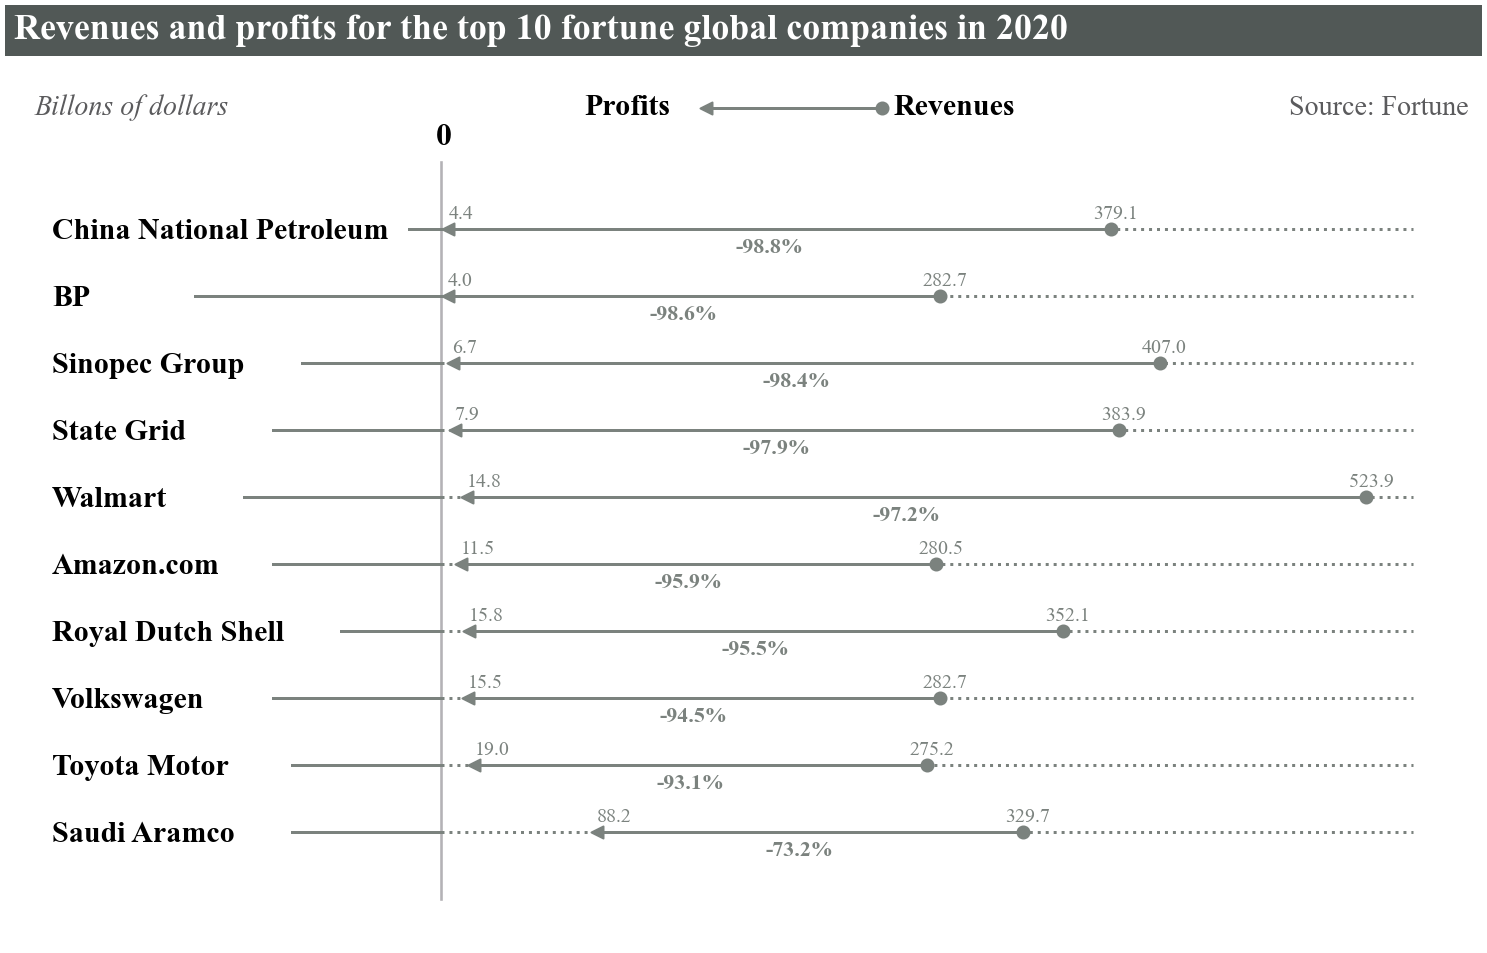

In [21]:

draw_fortune_10('#7b827e')
    

# 2 Decluttering

In [22]:
data = {'2019':[101, 78, 91, 77, 78, 71, 78, 62, 68, 50, 43, 41], 
        '2018':[38, 47, 49, 42, 42, 38, 43, 52, 49, 67, 74, 86]}
months = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November','December']
#months_simplified = [i[:3] for i in months]


The original graph has several unnecessary graph elements: borders, gridlines, and data markers, which make itoverly complicated and harder to understand what we are viewing.

1. Make the x tick labels horizontal for easier reading. As mentioned in lecture, it takes 30% more time for theaudience to process rotated labels. 

2. Add in a y axis label 

3. Make the title more concise and move it to theupper-left 

4. Remove grid lines and top/right axis spines to make the data stand out more 

5. Increase line width and change line colors for easier viewing 

6. Remove data label markers but add shape markers so data pointsare easily seen 

7. Label the data directly and change labels to match line colors





=========================
Redesign steps=======================
1. We made sure there were no gridlines - they add clutter and are not particularly helpful since the goal of
this plot is to show a trend, not to provide the reader specific data points.
2. We removed the top and right axes for a less crowded look and adjusted the y axis so that it went from 0
to 120000. We made the line width of the axes smaller and changed the color to grey.
3. We shortened the month names so that they would fit horizontally. Angled text is harder to read and
should be avoided whenever possible.
4. We made the title left-justified and removed the subtitle. We added a label to the y-axis and removed
the x-axis label since it is obvious that the x-axis contains the months.
5. We excluded the datapoint labels. Since the purpose of this graph was to show a trend, we did not feel it
was important to include labels at every single datapoint.
6. We labeled each line directly instead of having a legend. This makes use of the property of proximity.
7. We wanted to tell the story of car sales declining in 2019, so we decided to make the 2018 line grey in
order to add emphasis to the downward 2019 trend.

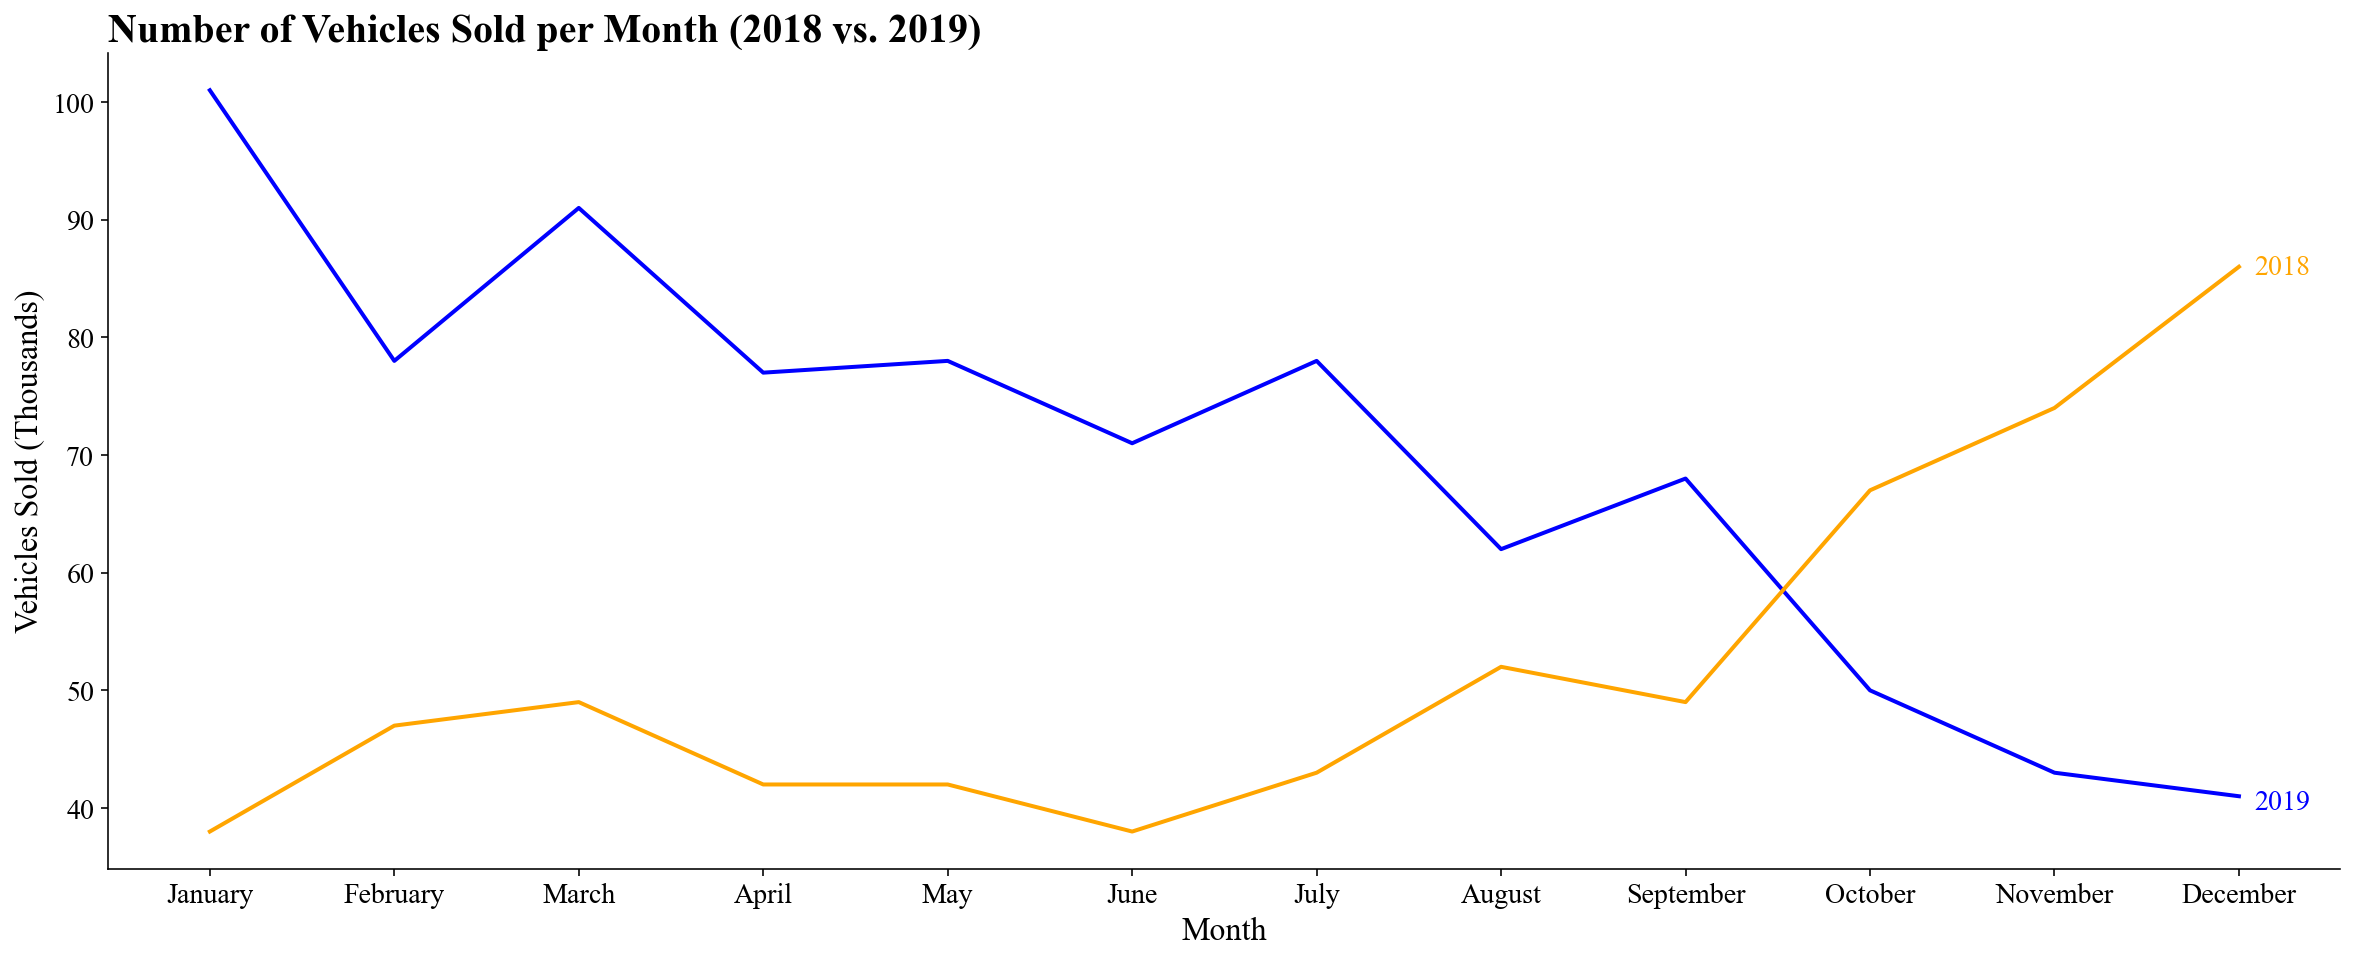

In [23]:
fig,ax=plt.subplots(figsize=(20,7.5))
line1=plt.plot(data['2019'],lw=2,label='2019',color='blue')
line2=plt.plot(data['2018'],lw=2,label='2018',color='orange')
ax.set_xticks(np.arange(12))
ax.set_xticklabels(months)
ax.set_xlabel("Month",fontsize=16)
ax.set_ylabel("Vehicles Sold (Thousands)",fontsize=16)
ax.tick_params(axis="both",labelsize=14)
ax.set_title("Number of Vehicles Sold per Month (2018 vs. 2019)",loc="left",fontsize=20, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.87,0.675,'2018',transform=fig.transFigure,fontsize=14,color='orange')
ax.text(0.87,0.180,'2019',transform=fig.transFigure,fontsize=14,color='blue')

plt.show()


# 3 Which Gestalt principles are in use?

Figure 2: 

1. Closure - eliminated the right and left borders so that the data stands out more 

2. Similarity - labelsand graph lines are the same color to show that they correspond. For example, we can tell that the red line is"Prior Prediction" because the text is also labeled red.

Figure 3:

Weekly estimated deaths: 

1. Enclosure - rectangular boxes around data for different years so it's easy to telltimeframes 

2. Proximity = the white space between the rows keeps each row physically close together. Our eyesare drawn to the row demarcations.

No Trump card: 
1. Closure - top and left borders are removed 

2. Similarity - The dark blue corresponds tocertain years which are also colored dark blue. Other lines are in lighter, more muted colors so we know theyaren't the focus of the graph.The use of contrasts allows certain data points to stand out and draw our eyes to them - it helps emphasize thepoint the graph is making.

In [24]:
y_pos = 200
rev_prof = [
('Walmart', 524.0, 14.9, y_pos),
('Sinopec Group', 407.0, 6.8, y_pos-20),
('State Grid', 383.9, 8.0, y_pos-40),
('China National Petroleum', 379.1, 4.4, y_pos-60), ('Royal Dutch Shell', 352.1, 15.8, y_pos-80), ('Saudi Aramaco', 329.8, 88.2, y_pos-100), ('Volkswagen', 282.8, 15.5, y_pos-120),
('BP', 282.6, 4.0, y_pos-140),
('Amazon.com', 280.5, 11.6, y_pos-160),
('Toyota Motor', 275.3, 19.1, y_pos-180) ]

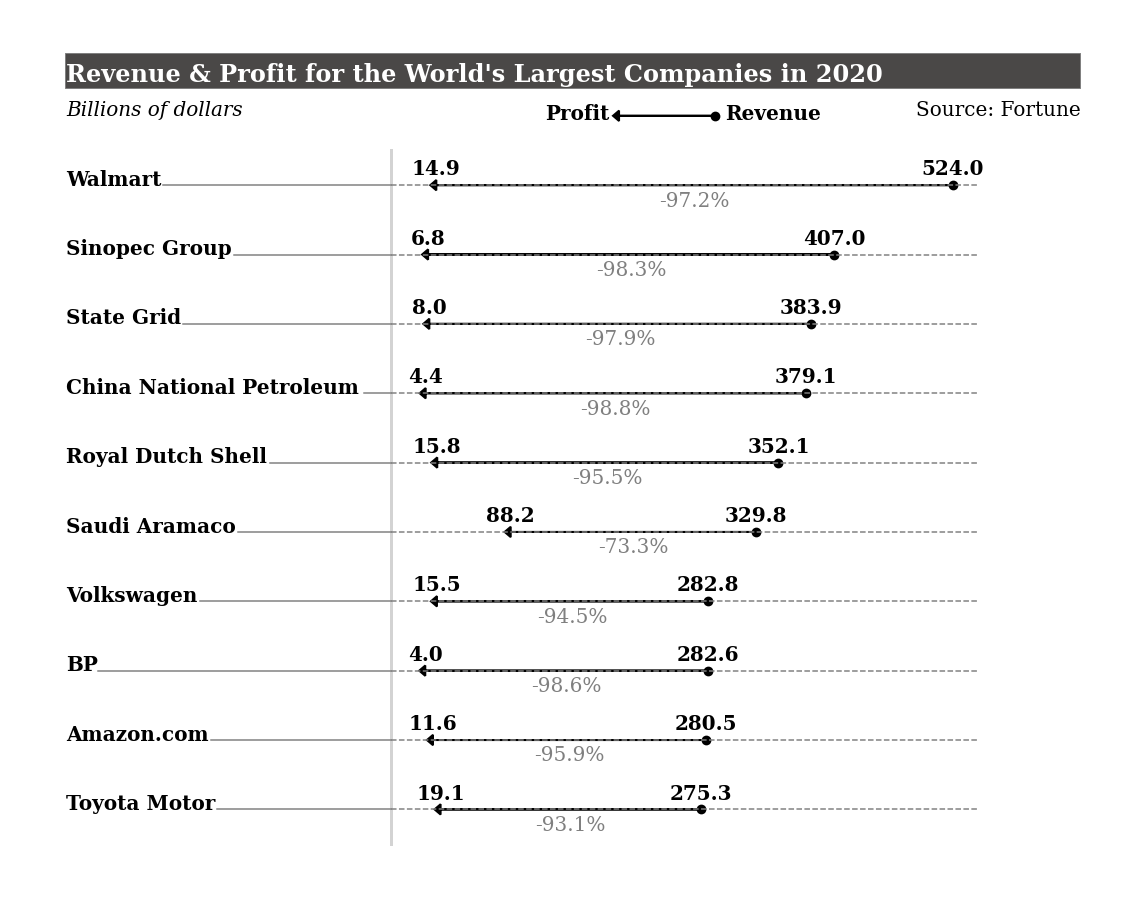

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ybound(-100, 600)
ax.set_ybound(0, 200)
ax.set_xbound(-350, 1200)
grey = '#706c6c'
#title and subtitles
ax.text(-350, 230, "Revenue & Profit for the World's Largest Companies in 2020", fontweight='bold', fontsize=12, fontname='Serif', color='white')
ax.text(-350, 220, "Billions of dollars", fontstyle='italic', fontname='Serif')
ax.text(488,220,"Source: Fortune", fontname='Serif')
rect = patches.Rectangle(xy=(-351,228), width=1000, height=10, facecolor='#4a4847', linewidth=.5, edgecolor="grey")
ax.add_patch(rect)
#legend
y_legend = 220
x_legend = 200
ax.scatter(x_legend + 90,y_legend, color = 'black', s=15)
ax.arrow(x_legend+90, y_legend, -95, 0, head_width=3, head_length =6, fc='black', ec='black')
ax.text(x_legend-15,y_legend-1,"Profit", horizontalalignment='right', fontweight='bold',fontname='Serif')
ax.text(x_legend + 100,y_legend-1,"Revenue", horizontalalignment='left', fontweight='bold', fontname='Serif')
ax.plot([-30, -30],[10, 210], '-', c='lightgrey') #vertical line

fig_r = fig.canvas.get_renderer()
for p in rev_prof:
    ax.text(p[1],p[3]+3,p[1], horizontalalignment='center', c='black',
    fontname='Serif', fontweight='bold') #revenue label
    ax.text(p[2],p[3]+3,p[2], horizontalalignment='center', c='black',
    fontname='Serif', fontweight='bold')  #profit label
    ax.text((p[1]+p[2])/2,p[3]-6,"{:+.1f}%".format((p[2]-p[1])/p[1] * 100), horizontalalignment='center', c='grey', fontname='Serif') #profit label
    company_name_text = ax.text(-350,p[3],p[0],horizontalalignment='left', fontweight='bold', fontname='Serif') #company name
    bbox = company_name_text.get_window_extent(renderer=fig_r)
    ax.plot([-350 + bbox.width * 2,-30],[p[3],p[3]], '-', color='grey',lw=0.75) #solid grey line before vertical line
    ax.plot([-30,550],[p[3],p[3]], '--', color='grey',lw=0.75) #dotted grey line
    ax.scatter(p[1],p[3], color='black', s=15) # revenue point
    ax.arrow(p[1],p[3],(p[2]-p[1]),0, head_width=3, head_length =6, fc='black', ec='black')
ax.axis("off") 
plt.show()

In [26]:
"""
fig, ax = plt.subplots(figsize=(10,5))
color_2018 = '#9fb7c4'
color_2019 = '#2b5f7a'
ax.plot(df_vehicles['Month'], df_vehicles['2018'], lw=3, color=color_2018, label='2018')
ax.plot(df_vehicles['Month'], df_vehicles['2019'], lw=3, color=color_2019, label='2019')
ax.text(-2, 130000,'After strong growth in 2018, car sales fall in 2019', size=14, fontweight='bold')
ax.set_ylabel('Number of cars sold', size=12)
ax.set_ybound(0,120000)
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.spines['left'].set_linewidth(.5)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_linewidth(.5) 
ax.spines['bottom'].set_color('grey')
month_abb = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(month_abb)
num_cars=['0','20K','40K','60K','80K','100K','120K'] 
ax.set_yticklabels(num_cars)
ax.text(11.2, 85500,'2018', color=color_2018, fontweight='bold',fontsize=13)
ax.text(11.2, 40000,'2019', color=color_2019, fontweight='bold',fontsize=13)
ax.axis() 
plt.show()

"""

"\nfig, ax = plt.subplots(figsize=(10,5))\ncolor_2018 = '#9fb7c4'\ncolor_2019 = '#2b5f7a'\nax.plot(df_vehicles['Month'], df_vehicles['2018'], lw=3, color=color_2018, label='2018')\nax.plot(df_vehicles['Month'], df_vehicles['2019'], lw=3, color=color_2019, label='2019')\nax.text(-2, 130000,'After strong growth in 2018, car sales fall in 2019', size=14, fontweight='bold')\nax.set_ylabel('Number of cars sold', size=12)\nax.set_ybound(0,120000)\nax.spines['top'].set_visible(False) \nax.spines['right'].set_visible(False) \nax.spines['left'].set_linewidth(.5)\nax.spines['left'].set_color('grey')\nax.spines['bottom'].set_linewidth(.5) \nax.spines['bottom'].set_color('grey')\nmonth_abb = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']\nax.set_xticklabels(month_abb)\nnum_cars=['0','20K','40K','60K','80K','100K','120K'] \nax.set_yticklabels(num_cars)\nax.text(11.2, 85500,'2018', color=color_2018, fontweight='bold',fontsize=13)\nax.text(11.2, 40000,'2019', colo

In [28]:

"""
car_data_y = np.array([38, 47, 49, 42, 42, 38, 43, 52, 49, 67, 74, 86, 101, 78, 91, 77, 78, 71, 78, 62, 68, 50, 43, 41]) * 1000
x_mid_index = int(len(car_data_x)/2) 
color_2018 = '#9fb7c4'
color_2019 = '#2b5f7a'
x_tick_spacing = 4
x_ticklabels = [car_data_x[i] for i in range(0, len(car_data_x), x_tick_spacing)] + ["Dec. 2019"]
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.plot(range(x_mid_index+1), car_data_y[:x_mid_index+1], linewidth=3, c=color_2018) 
ax.plot(range(x_mid_index, len(car_data_x)), car_data_y[x_mid_index:], linewidth=3, c=color_2019)
ax.set_xticklabels(x_ticklabels, fontsize=12)
ax.set_xticks(list(range(0, len(car_data_x), x_tick_spacing)) + [len(car_data_x)-1])
ax.set_yticks([0, 20000, 40000, 60000, 80000, 100000, 120000]) 
ax.set_yticklabels(['0', '20k', '40k', '60k', '80k', '100k', '120k'], fontsize=12) 
ax.text(-2, 127000, "After strong growth in 2018, car sales fall in 2019", fontsize=16, fontweight='bold')
ax.plot([x_mid_index, len(car_data_x)/2], [0, 120000], '--', c='grey') 
ax.text(x_mid_index-1, 110000, "2018", horizontalalignment='right', size=14, c=color_2018, fontweight='bold')
ax.text(x_mid_index+1, 110000, "2019", horizontalalignment='left', size=14, c=color_2019, fontweight='bold')
ax.set_ylabel("Number of Cars Sold", fontsize=12) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_linewidth(.5)
ax.spines['bottom'].set_color('grey')
plt.ylim(0, 120000) 
plt.show()

"""

'\ncar_data_y = np.array([38, 47, 49, 42, 42, 38, 43, 52, 49, 67, 74, 86, 101, 78, 91, 77, 78, 71, 78, 62, 68, 50, 43, 41]) * 1000\nx_mid_index = int(len(car_data_x)/2) \ncolor_2018 = \'#9fb7c4\'\ncolor_2019 = \'#2b5f7a\'\nx_tick_spacing = 4\nx_ticklabels = [car_data_x[i] for i in range(0, len(car_data_x), x_tick_spacing)] + ["Dec. 2019"]\nfig,ax = plt.subplots(1,1,figsize=(12,8))\nax.plot(range(x_mid_index+1), car_data_y[:x_mid_index+1], linewidth=3, c=color_2018) \nax.plot(range(x_mid_index, len(car_data_x)), car_data_y[x_mid_index:], linewidth=3, c=color_2019)\nax.set_xticklabels(x_ticklabels, fontsize=12)\nax.set_xticks(list(range(0, len(car_data_x), x_tick_spacing)) + [len(car_data_x)-1])\nax.set_yticks([0, 20000, 40000, 60000, 80000, 100000, 120000]) \nax.set_yticklabels([\'0\', \'20k\', \'40k\', \'60k\', \'80k\', \'100k\', \'120k\'], fontsize=12) \nax.text(-2, 127000, "After strong growth in 2018, car sales fall in 2019", fontsize=16, fontweight=\'bold\')\nax.plot([x_mid_index, 